# **M1 Intro to ML - Adaline**


Code Repository: https://github.com/rasbt/python-machine-learning-book-2nd-edition

Code License: [MIT License](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/LICENSE.txt)


# Adaline

1. An Object-Oriented Adaline API (Batch Gradient Descent)
2. Iris Dataset (Setosa vs Virginica)
3. Iris Dataset (Versicolor vs Virginica) 
4. Adaline (Stochastic Gradient Descent)
5. XOR Dataset
6. Conclusions
7. Logistic Regression (Optional)
8. SGDClassifier (Optional)

In [ ]:
from IPython.display import Image

#**1. An Object-Ortiented Adaline API**
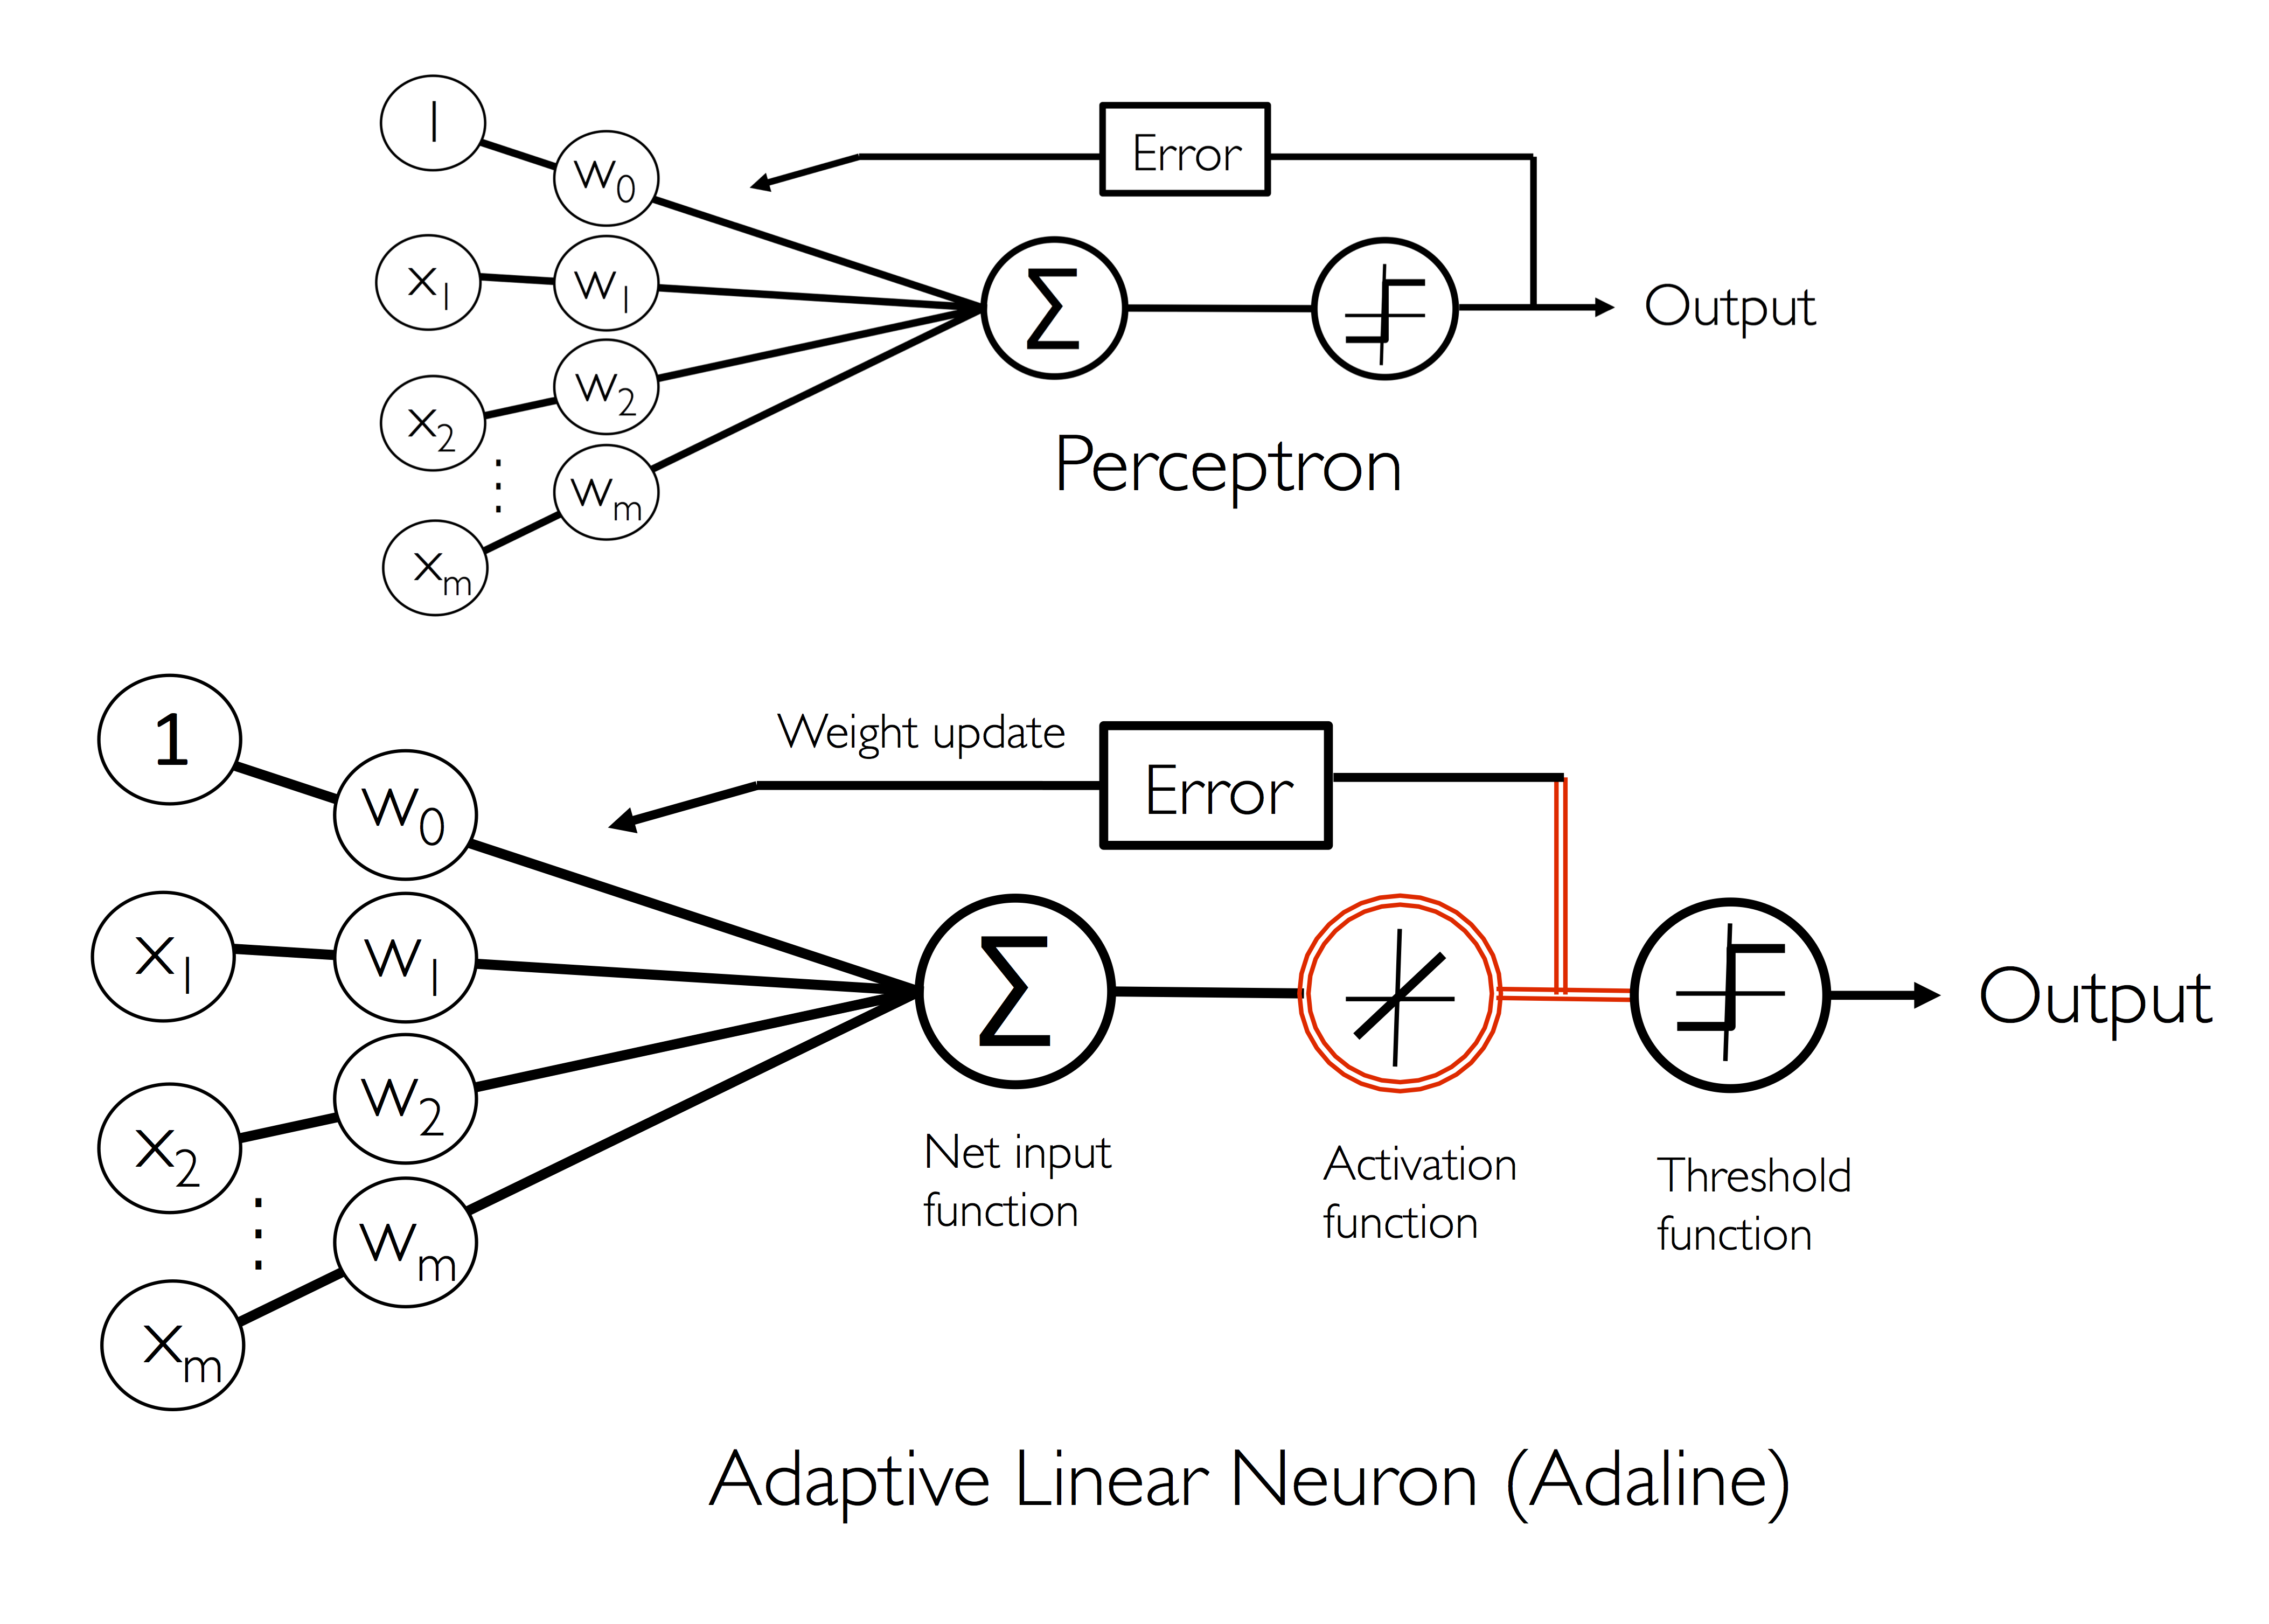

Math:
Let $x^{(i)}=(1,x_1^{(i)},\ldots ,x_m^{(i)})$ denote the $m$-dimensional input vector of instance $(i)$, $x = (x^{(1)},\ldots,x^{(n)})^T$ the vector of instance vectors, and $w=(w_0,\ldots,w_m)$the  $m$-dimensional weight vector (with $w_0$ denoting the bias term).

The output of an Adaline, $ \phi({w^Tx})=w^Tx$, is computed simultanesouly for all instance vectors. Thus the "activation function," $\phi(\cdot)$, of an Adaline is an identity function.

In gradient descent the objective is to minimize a cost function. Here we will consider the sum of squared errors (SSE) loss function $J(w)=\frac{1}{2}\sum_i(y^{(i)}-\phi(x^{(i)}))^2$.

Here we assume "learning" takes place by updating weights simultaneously for all instance vectors (an approach called batch gradient descent), as follows:
$w=w+\Delta w$ where $\Delta w = -\eta \nabla J(w)$. The key idea here is that we update the weights by taking a small step (controlled by $\eta$) in the **opposite** direction of the gradient of the cost function, $\nabla J(w)$.

Here $\eta$ is the learning rate and $\nabla J(w) = (\frac{\partial J}{\partial w_0},\ldots,\frac{\partial J}{\partial w_m})$.

The derivation of $\frac{\partial J}{\partial w_j} = -\sum_i (y^{(i)}-\phi(z^{(i)}))x_j^{(i)}$ appears below.

We finally get $\Delta w_j = -\eta \frac{\partial J}{\partial w_j} = -\eta \sum_i (y^{(i)}-\phi(z^{(i)}))x_j^{(i)}$.
Note that the output $\phi(\cdot)$ is real-valued in the case of the Adaline (versus binary in the case of the Perceptron).  

If we set $\eta$ to be too large, the weights of the Adaline may fail to converge. If we set it too small, then a large number of epochs of training may be required to secure convergence of the weights. An epoch involves the computation of the weight changes for all the instances in the training dataset.

Natural questions that are begged in this discussion could deal with alternative activation functions and alternative cost functions. 

**Calculus:** $\frac{\partial J}{\partial w_j} \nabla J(w) = \frac{\partial}{\partial w_j} \frac{1}{2}\sum_i (y^{(i)}-\phi(z^{(i)})^2 = \frac{1}{2}\sum_i 2(y^{(i)}-\phi(z^{(i)})) \frac{\partial}{\partial w_j} (y^{(i)}-\phi(z^{(i)})^2$
$=\sum_i (y^{(i)}-\phi(z^{(i)})) \frac{\partial}{\partial w_j} (y^{(i)}-\sum_kw_kx_k^{(i)}) = -\sum_i (y^{(i)}-\phi(z^{(i)}))x_j^{(i)}$

## Minimizing cost functions with gradient descent

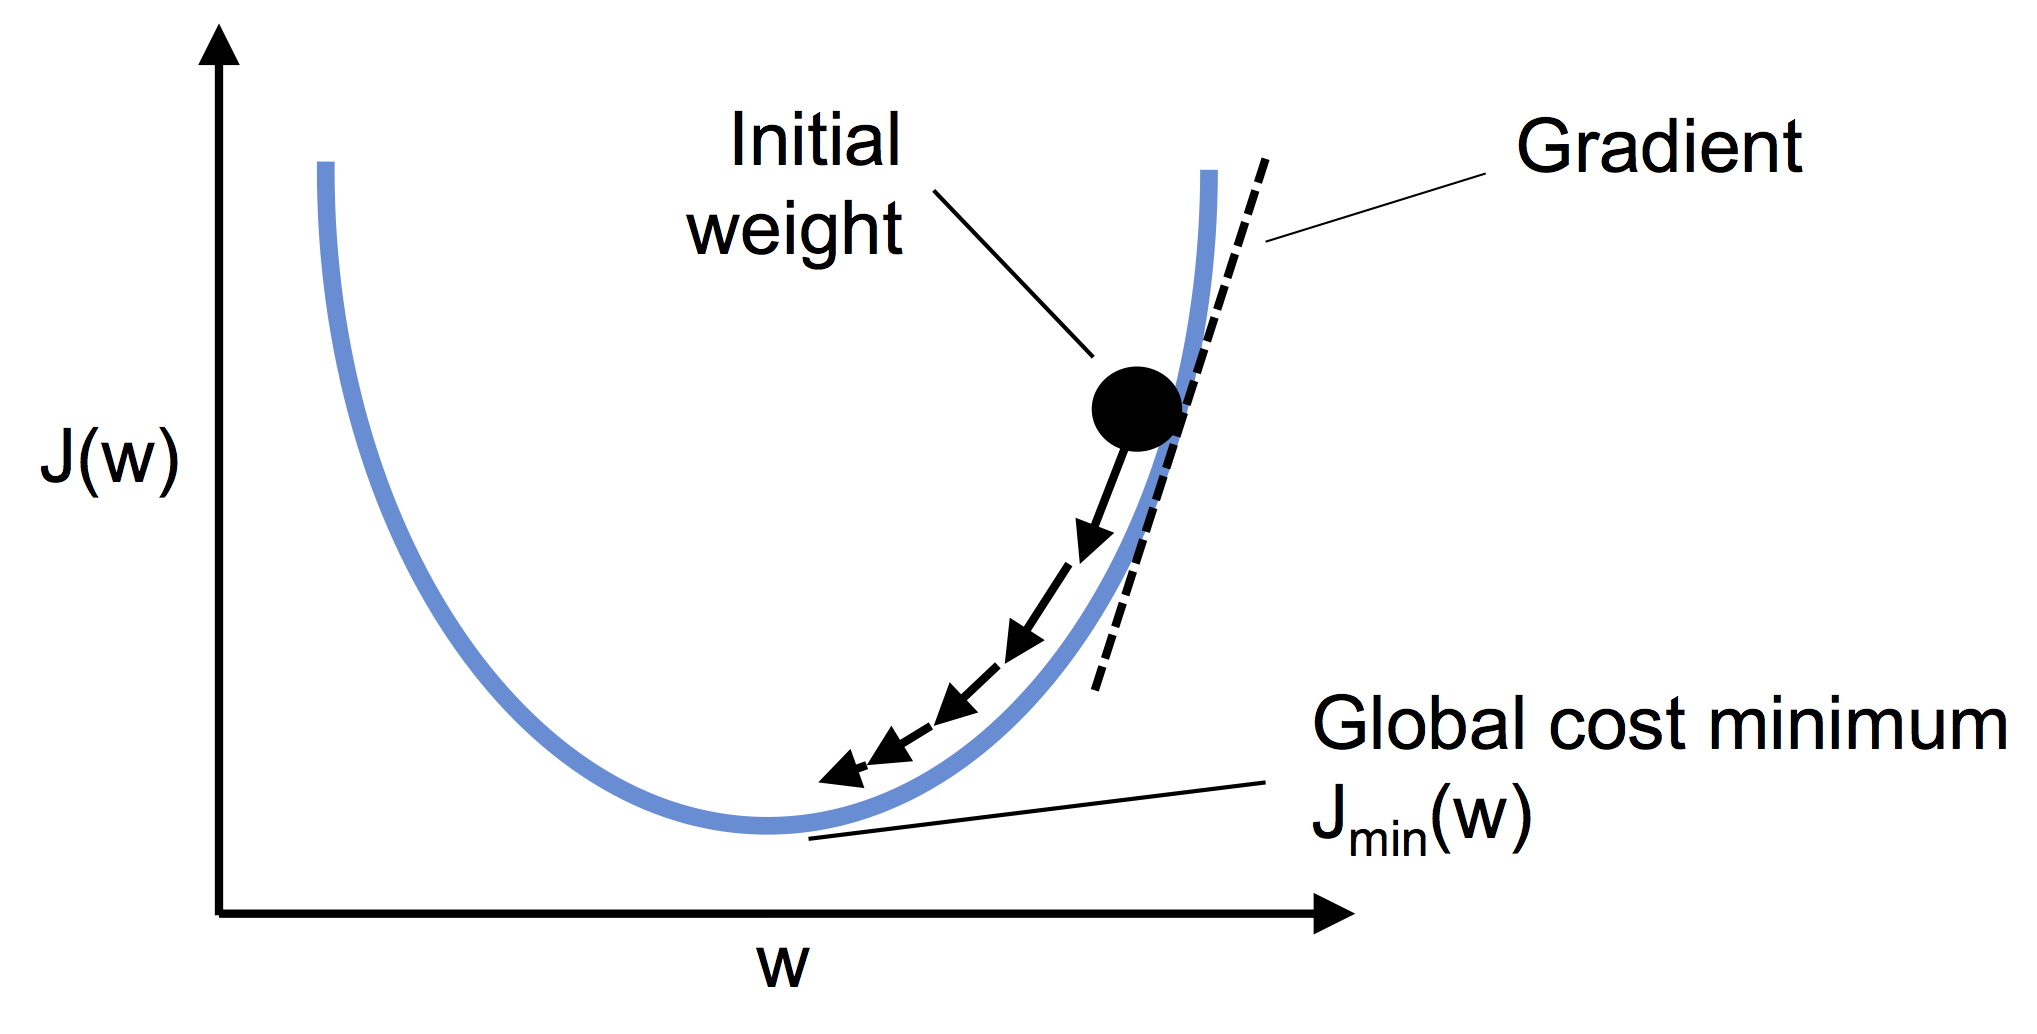

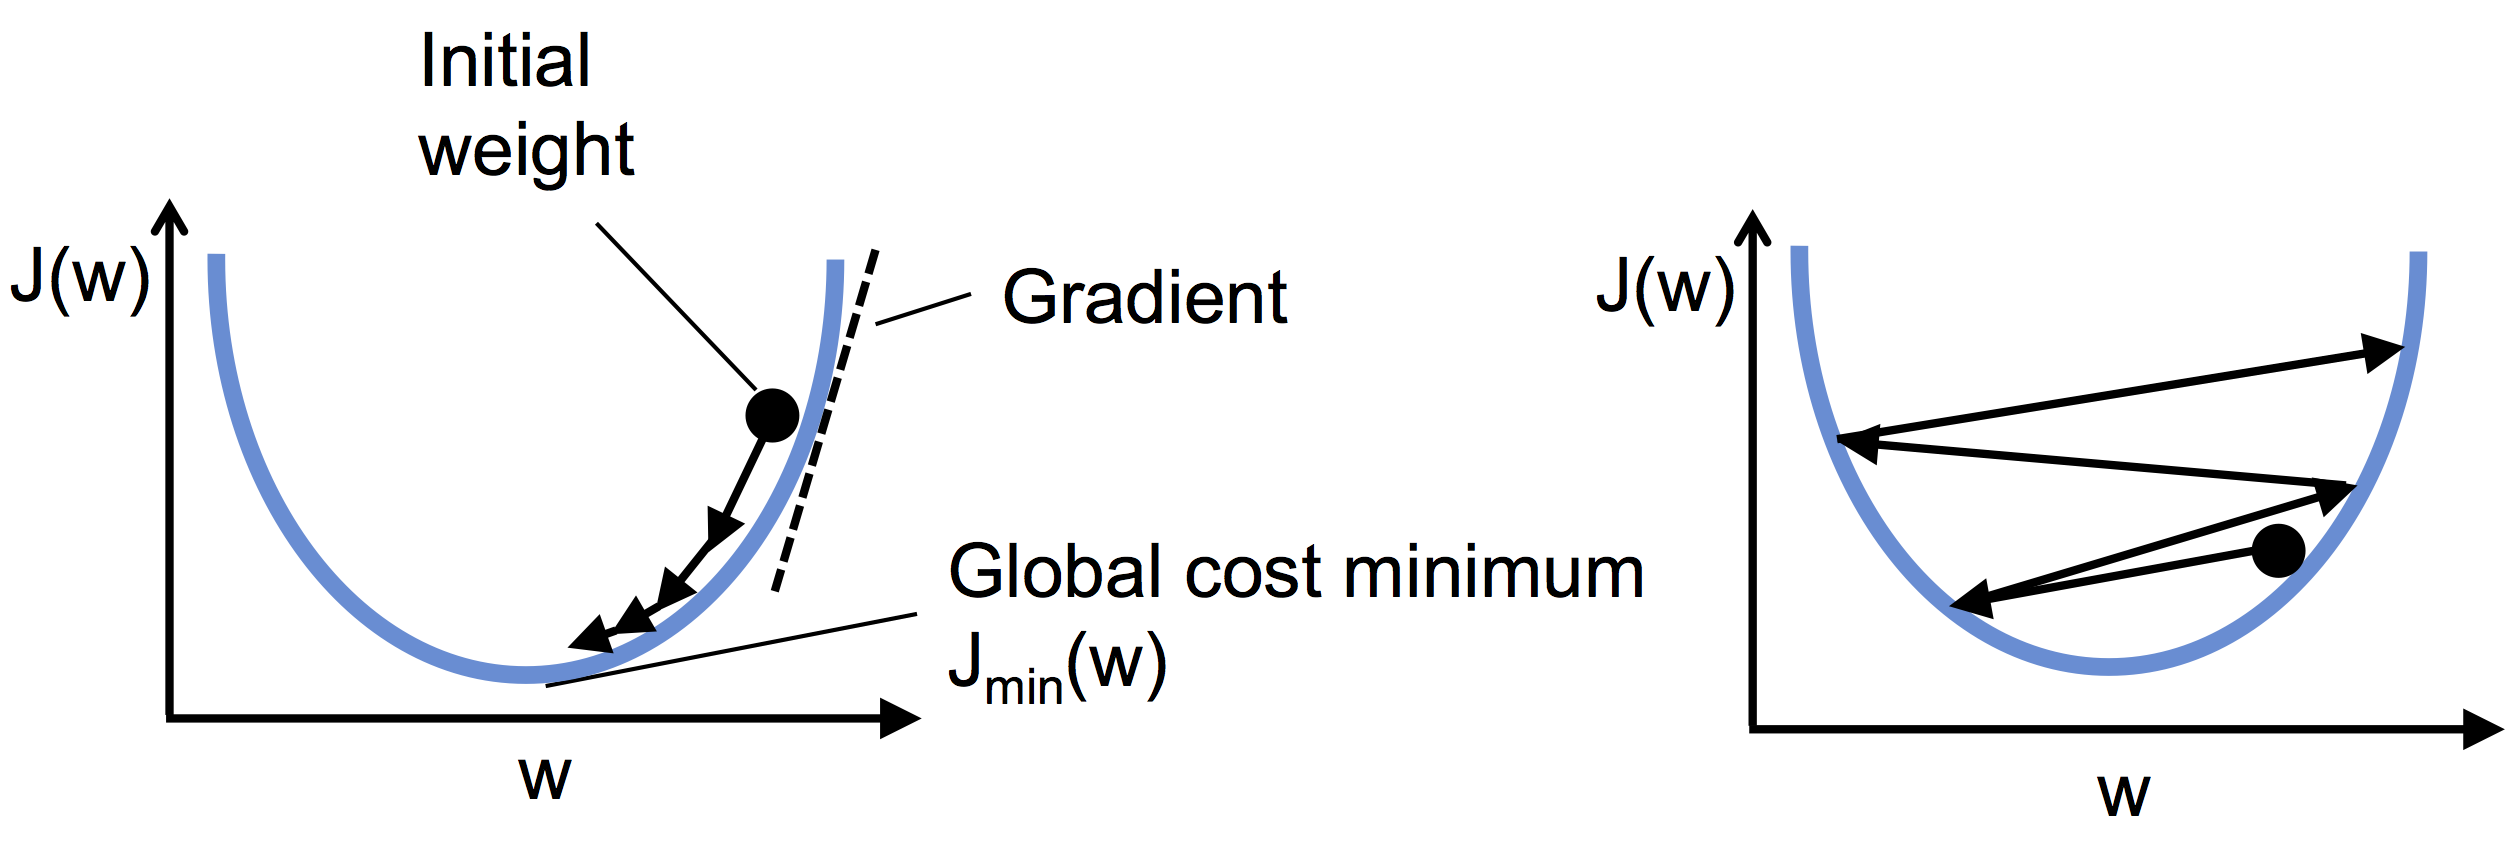

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
# Import libraries
import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
class AdalineGD(object):
    """ADAptive LInear NEuron (Adaline) classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

#**2. Iris Dataset (Setosa vs Virginica)**

In [ ]:
# Import pandas linrary
import pandas as pd

# Read iris.data file from UCI Machine Learning Repo into data frame and display its tail (the last five instances)
# The data dictionary for this data set is as follows:
# Column 0: Petal length
# Column 1: Petal width
# Column 2: Sepal length
# Column 3: Sepal width
# Column 4: Species of iris (setosa/virginica/versicolor)
# The first 50 instances are iris setosa, the next 50 instances are iris versicolor, and the final 50 instances are iris virginica  
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### *Plotting the Iris data*

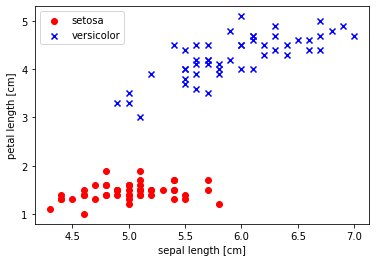

Note that it is easy to separate iris setosa and iris virginica


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()
print("Note that it is easy to separate iris setosa and iris virginica")

### *Training Adaline models*

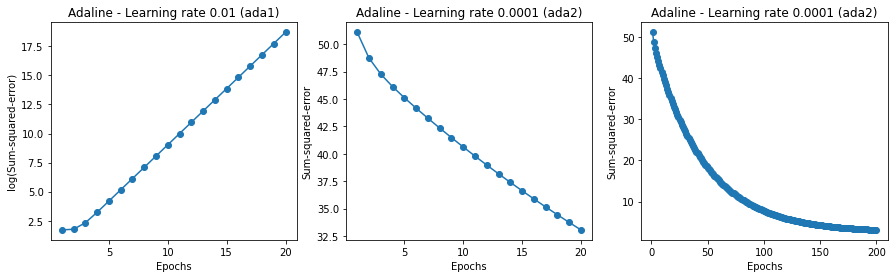

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

ada1 = AdalineGD(n_iter=20, eta=0.001).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01 (ada1)')

ada2 = AdalineGD(n_iter=20, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001 (ada2)')

ada3 = AdalineGD(n_iter=200, eta=0.0001).fit(X, y)
ax[2].plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline - Learning rate 0.0001 (ada2)')
plt.show()

### *A function for plotting decision regions*

In [ ]:
# Import matplotlib library components 
from matplotlib.colors import ListedColormap

# Function to plot two-variable decision regions of a classifier 
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black') 

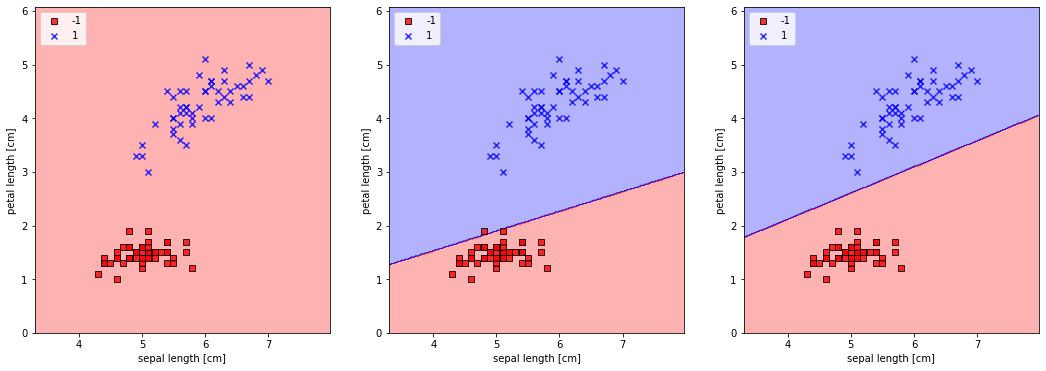

In [ ]:
# Plot decision region
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
plot_decision_regions(X, y, classifier=ada1)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.subplot(1,3,2)
plot_decision_regions(X, y, classifier=ada2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.subplot(1,3,3)
plot_decision_regions(X, y, classifier=ada3)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

<br>
<br>

In [ ]:
# Produce confusion matrix and print accuracy
y_hat = ada1.predict(X)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (ada1 model)\n",cm, "\n\nAccuracy = ",accuracy)   

y_hat = ada2.predict(X)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (ada2 model)\n",cm, "\n\nAccuracy = ",accuracy)   

y_hat = ada3.predict(X)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (ada3 model)\n",cm, "\n\nAccuracy = ",accuracy)    

Confusion matrix (ada1 model)
 [[50  0]
 [50  0]] 

Accuracy =  0.5
Confusion matrix (ada2 model)
 [[49  1]
 [ 0 50]] 

Accuracy =  0.99
Confusion matrix (ada3 model)
 [[50  0]
 [ 0 50]] 

Accuracy =  1.0


#**3. Iris Dataset (Versicolor & Virginica)**



(150, 5)
(100, 2) (100,)


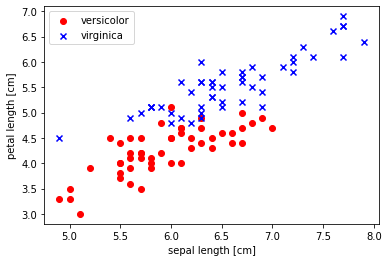

Note that it is LESS easy to separate iris virginica  and iris virginica


In [ ]:
# Now classify versicolor vs virginica
%matplotlib inline

# select setosa and versicolor
y = df.iloc[50:150, 4].values                  
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length and petal length
X = df.iloc[50:150, [0, 2]].values
print(df.shape)
print(X.shape, y.shape)

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='versicolor')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()
print("Note that it is LESS easy to separate iris virginica  and iris virginica")

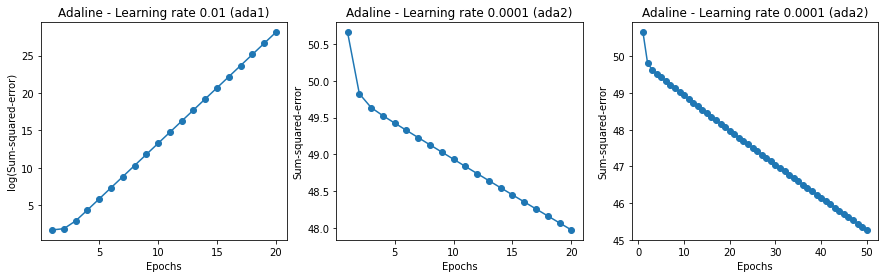

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

ada1 = AdalineGD(n_iter=20, eta=0.001).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01 (ada1)')

ada2 = AdalineGD(n_iter=20, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001 (ada2)')

ada3 = AdalineGD(n_iter=50, eta=0.0001).fit(X, y)
ax[2].plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline - Learning rate 0.0001 (ada2)')
plt.show()

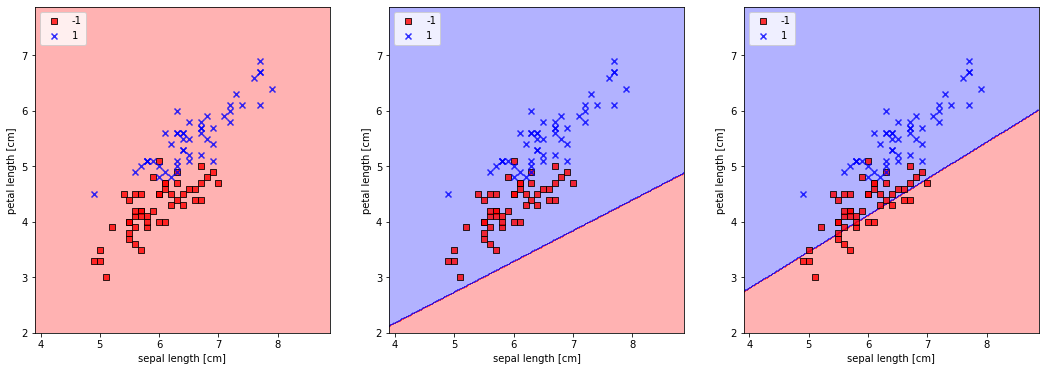

In [ ]:
# Plot decision region
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
plot_decision_regions(X, y, classifier=ada1)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.subplot(1,3,2)
plot_decision_regions(X, y, classifier=ada2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.subplot(1,3,3)
plot_decision_regions(X, y, classifier=ada3)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

In [ ]:
# Compute confusion matrix
y_hat = ada1.predict(X)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (ada1 model)\n",cm, "\n\nAccuracy = ",accuracy)   

y_hat = ada2.predict(X)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (ada2 model)\n",cm, "\n\nAccuracy = ",accuracy)  

y_hat = ada3.predict(X)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (ada3 model)\n",cm, "\n\nAccuracy = ",accuracy)    

Confusion matrix (ada1 model)
 [[50  0]
 [50  0]] 

Accuracy =  0.5
Confusion matrix (ada2 model)
 [[ 0 50]
 [ 0 50]] 

Accuracy =  0.5
Confusion matrix (ada3 model)
 [[13 37]
 [ 0 50]] 

Accuracy =  0.63


## Improving gradient descent through feature scaling

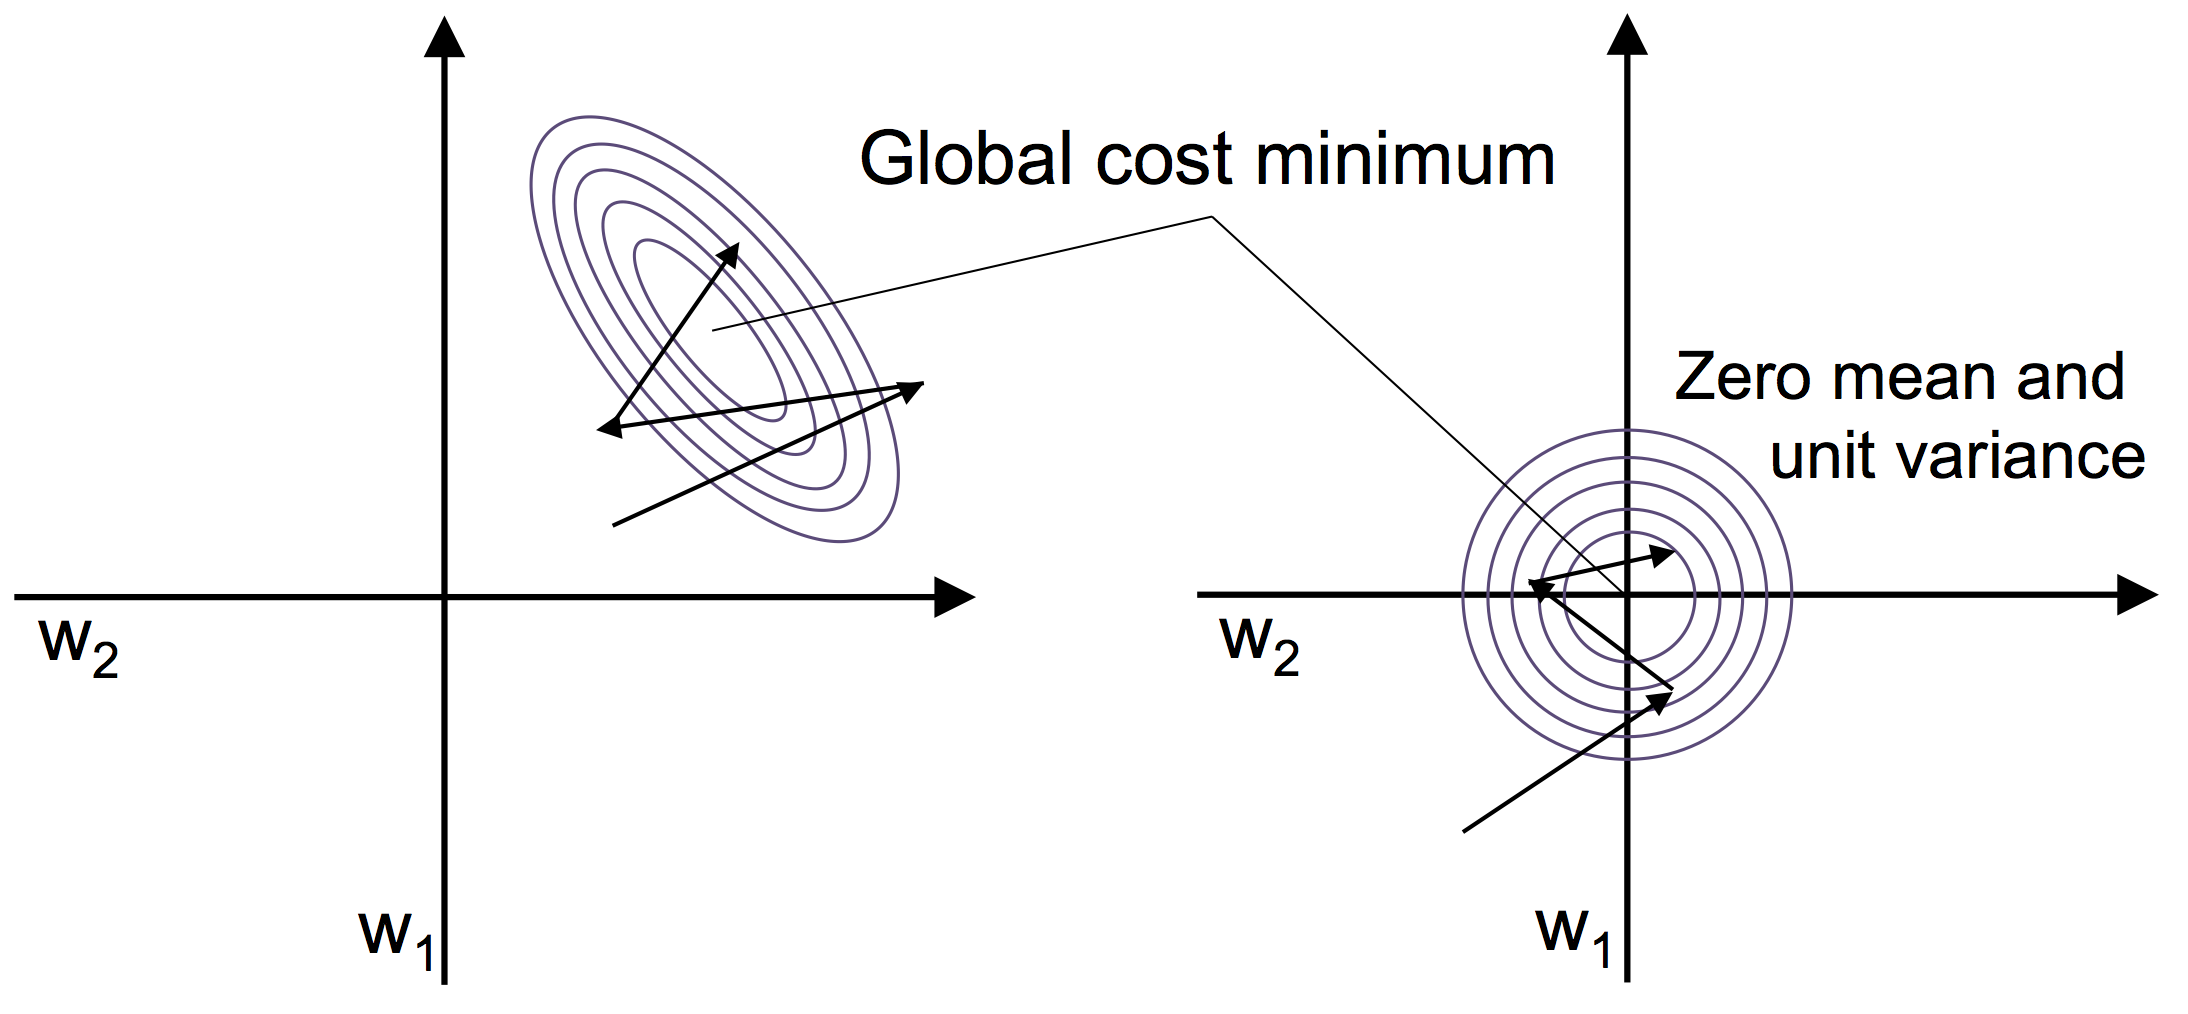

#*Standardization*: $x^{\prime}=\frac{x-\bar{x}}{s}$

#*Normalization*: $x^{\prime}=\frac{x-x_{min}}{x_{max}-x_{min}}$


In [ ]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

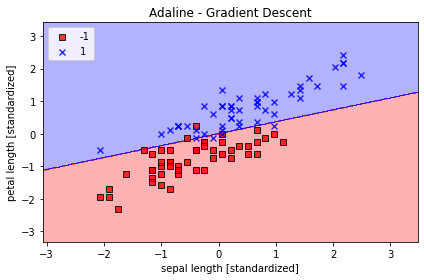

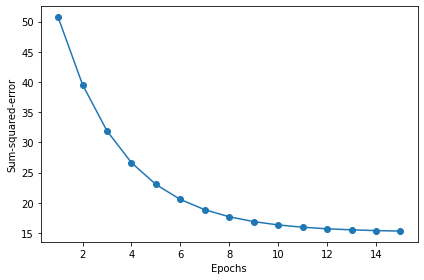

In [ ]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

In [ ]:
# Compute confusion matrix
y_hat = ada.predict(X_std)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (standardized data model)\n",cm, "\n\nAccuracy = ",accuracy)    
   

Confusion matrix (standardized data model)
 [[48  2]
 [ 3 47]] 

Accuracy =  0.95


#**4. Adaline (Stochastic Gradient Descent)**

Instead of using the entire dataset to compute the gradient (as in batch gradient descent), update the weights incrementally for each training instance. Instances have to be presented in random order, and the training set needs to be shuffled every epoch. Called stochastic gradient descent, or iterative/online gradient descent.

Advantages: faster convergence, may escape shallow local optima, and the algorithm is suitable for on-the-fly learning as instances "arrive."

In [ ]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training samples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

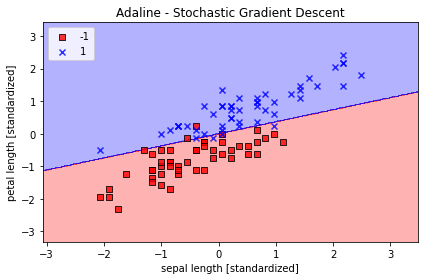

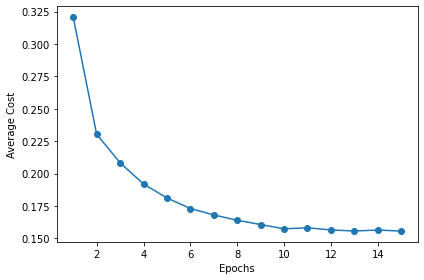

In [ ]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

In [ ]:
# Compute confusion matrix
y_hat = ada.predict(X_std)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (stochastic gradient descent model)\n",cm, "\n\nAccuracy = ",accuracy)     
   

Confusion matrix (stochastic gradient descent model)
 [[48  2]
 [ 3 47]] 

Accuracy =  0.95


In [ ]:
# Online Learning

ada.partial_fit(X_std[0, :], y[0])

#**5. XOR Dataset**

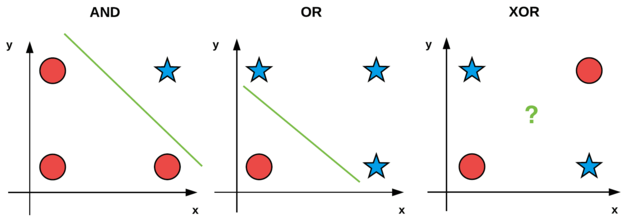
Source: https://www.pyimagesearch.com/2021/05/06/implementing-the-perceptron-neural-network-with-python/ Fair use claimed

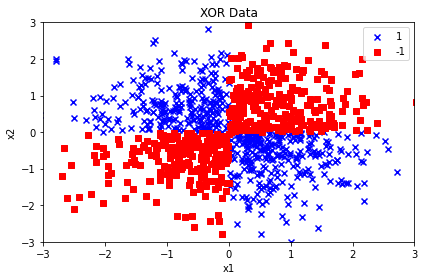

In [ ]:
# Create the XOR data set
np.random.seed(1)               # Set the seed to "1", for consistency 

###############################
X = np.random.randn(1000, 2) # Need to change here for assignment 
###############################

y = np.logical_xor(X[:, 0] > 0,   # https://numpy.org/doc/stable/reference/generated/numpy.logical_xor.html
                   X[:, 1] > 0)
y = np.where(y, 1, -1)

plt.scatter(X[y ==  1, 0], X[y ==  1, 1], c='b', marker='x', label='1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.title('XOR Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()
plt.show()

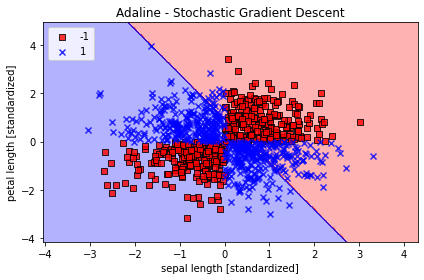

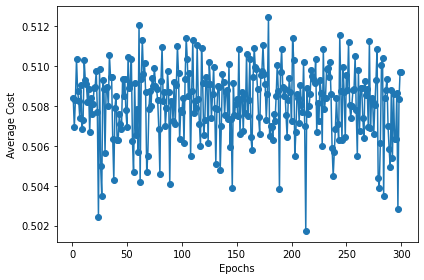

In [ ]:
ada = AdalineSGD(n_iter=300, eta=0.01, random_state=1)
ada.fit(X, y)

plot_decision_regions(X, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

In [ ]:
# Compute confusion matrix
y_hat = ada.predict(X)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (XOR model)\n",cm, "\n\nAccuracy = ",accuracy)     

Confusion matrix (XOR model)
 [[218 266]
 [122 394]] 

Accuracy =  0.612


#**6. Conclusions**

1. The number of iterations and $\eta$ matter.
2. Stochastic gradient descent may converge faster than batch gradient descent
3. Scaling may impact performance of gradient descent algorithms favoravbly
4. The Adaline classifier does a poor job on the XOR dataset because it is not linearly spearable.

#**7. Logistic Regression Classifier (Optional)**

Consider changing the activation function from the identity function, $\phi(z)=z$, to the sigmoid function, $\phi(z) = (1+e^{-z})^{-1}$. The output of a sigmoid function can be interpreted as a conditional probability in a binary classification setting: $$\phi(z) = (1+e^{-z})^{-1} = P(y=1|x,w)$$ A binary classification outcome is obtained by comparing $\phi(z)$ to a threshold, i.e., 

$\hat{y} = 1$ if $\phi(z)\geq $ threshold and $0$ otherwise.

The sun of squares loss function with the sigmnoid function as activation function is non-convex. To develop an alternative, note that we want $P(y=1|x,w)=\phi(z)$ to increase when $y=1$ and $P(y=0|x,w)=1-\phi(z)$ to increase when $y=0$. We can combine these ideas into a loss function for a single instance
$\phi(z)^y(1-\phi(z))^{1-y}$ and extend this across all instances in the data set to obtain the likelihood function $L(w) = \prod \phi(z)^y(1-\phi(z))^{1-y}$, which we want to maximize. In practice it is easier to maximize $$\log L(w) = \sum_i (y^{(i)}\log(\phi(z^{(i)}))+(1-y^{(i)})\log(1-\phi(z^{(i)})))$$
This loss function, with the sigmoid activation function, gives us the **logistic regression classifier**.








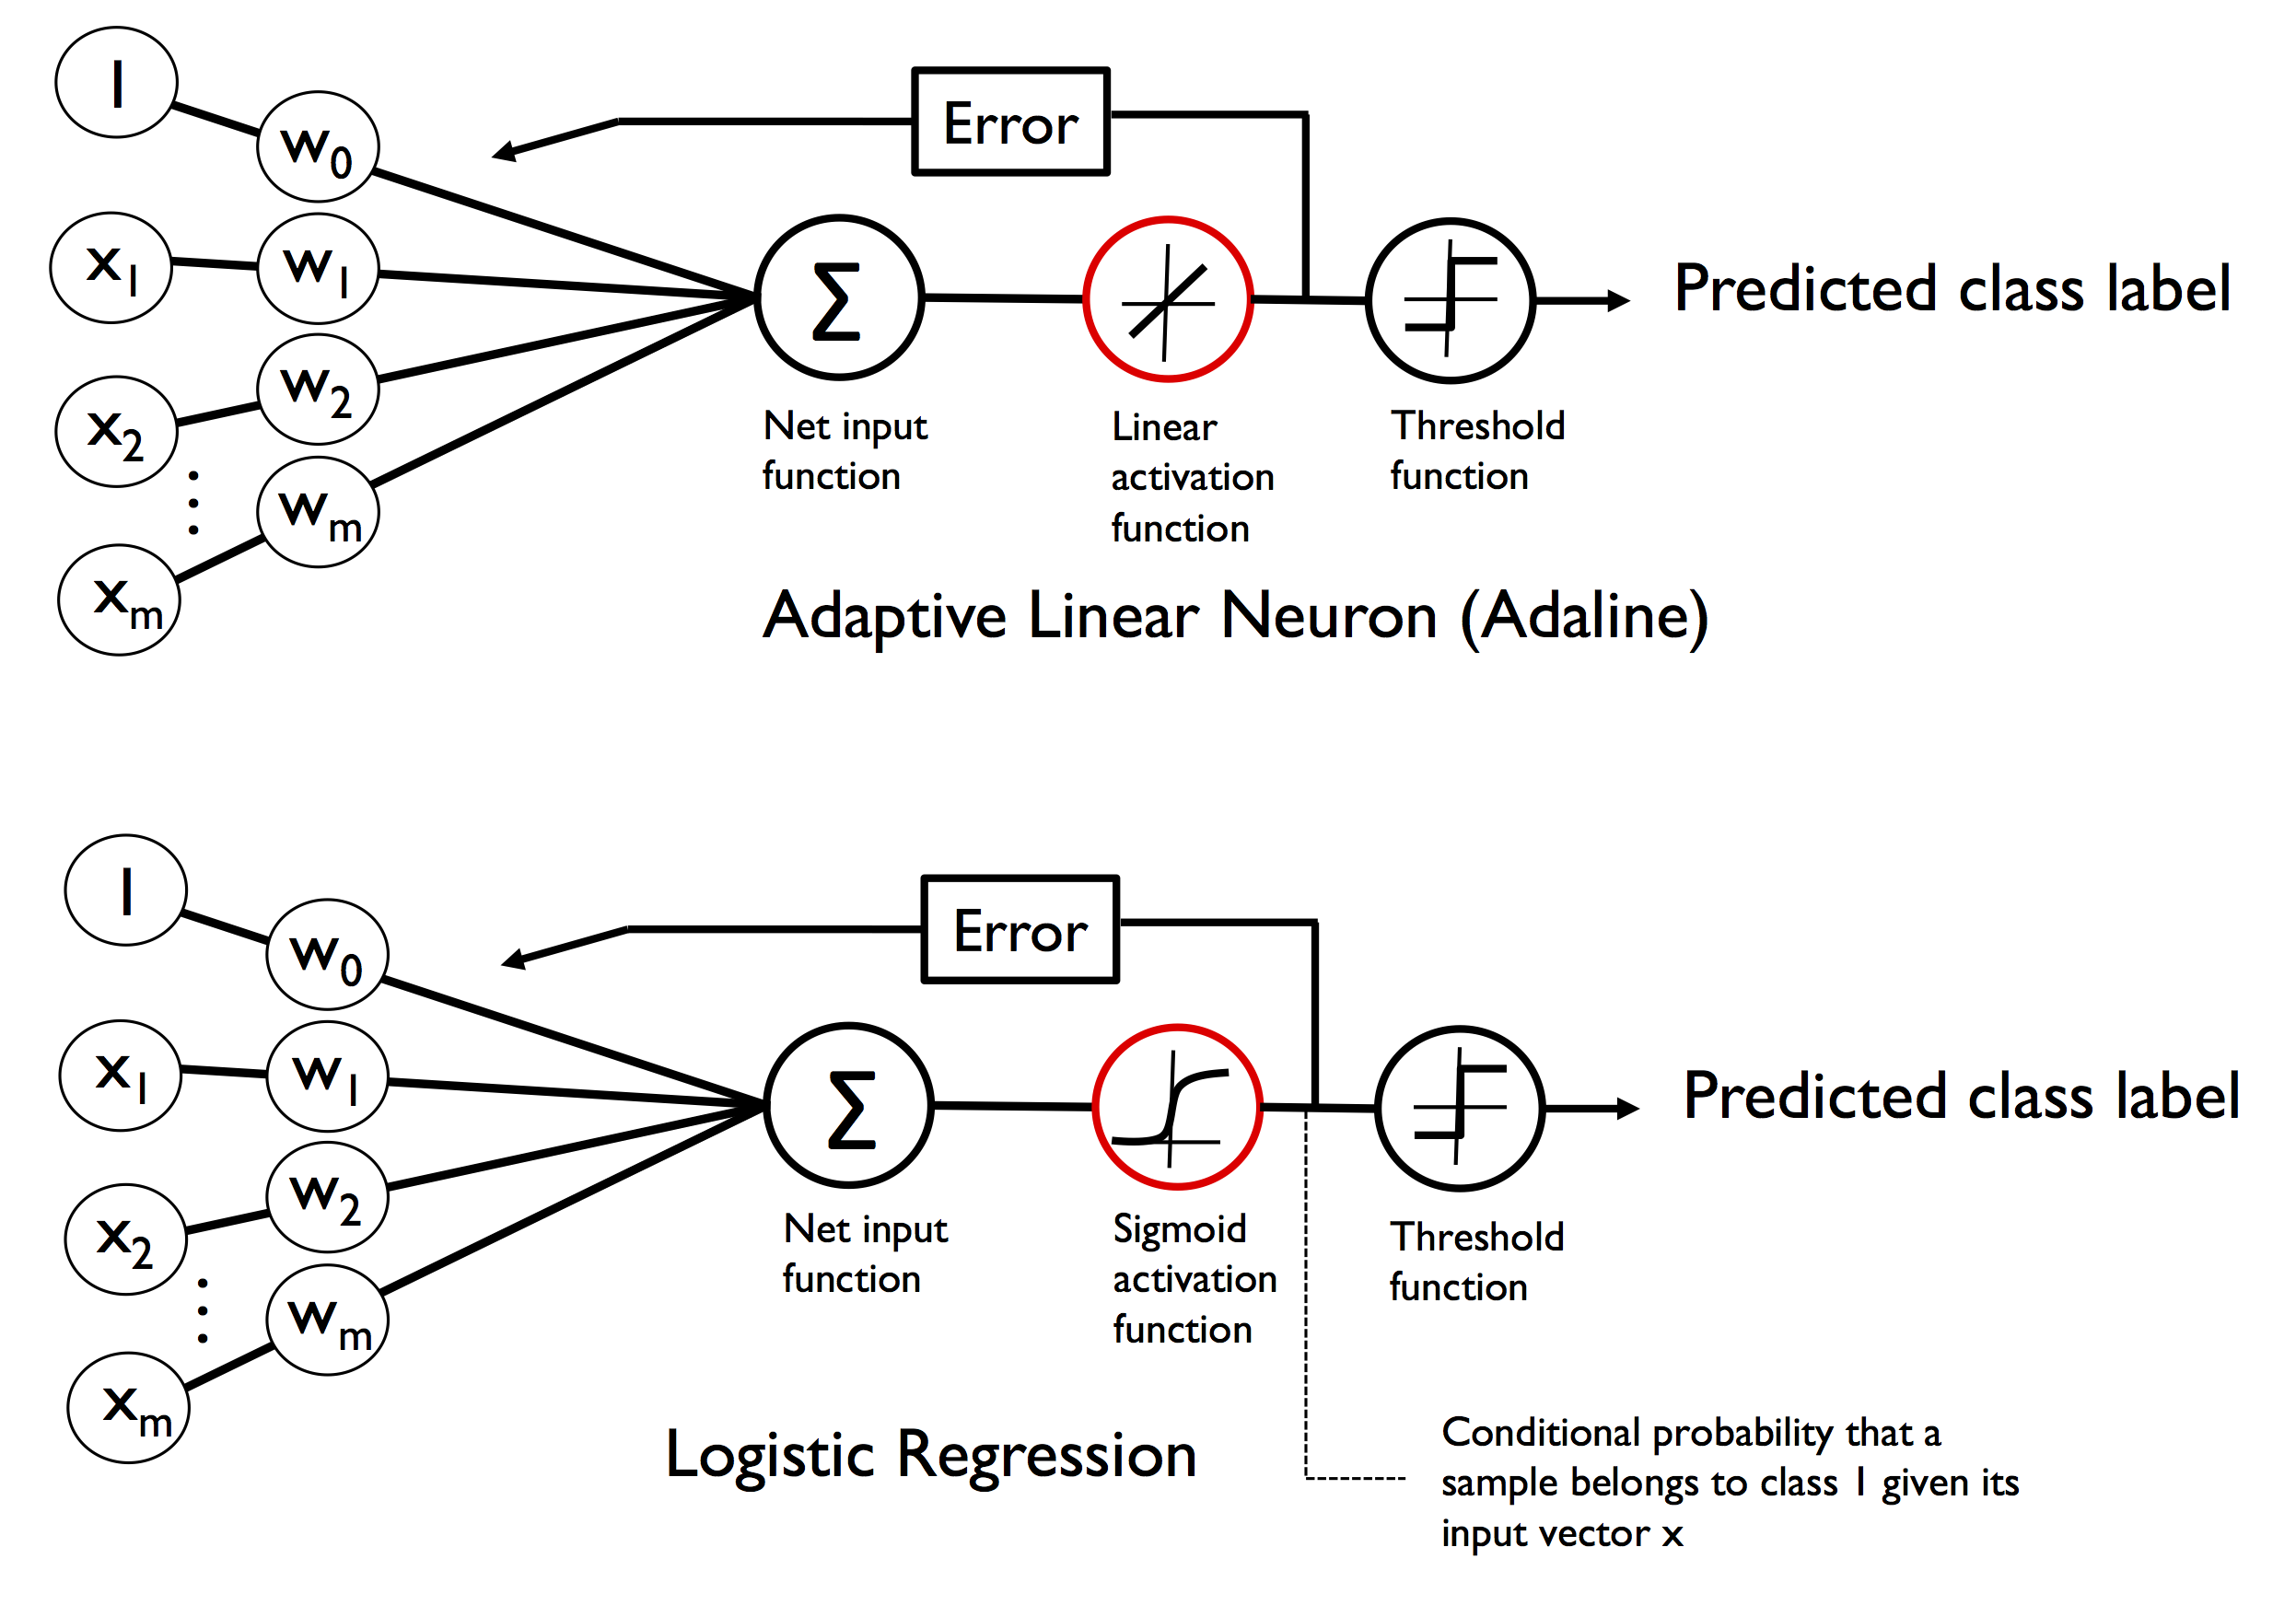

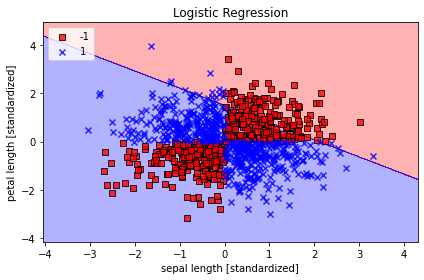

<Figure size 432x288 with 0 Axes>

Confusion matrix (XOR model)
 [[ 97 387]
 [ 17 499]] 

Accuracy =  0.596


In [ ]:
# sklearn implementation of LogisticRegression Classifier

# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Create logit instance and fit model
logreg = LogisticRegression()
logreg.fit(X, y)

# Plot decision regions
plot_decision_regions(X, y, classifier=logreg)
plt.title('Logistic Regression')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

# Compute confusion matrix
y_hat = logreg.predict(X)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (XOR model)\n",cm, "\n\nAccuracy = ",accuracy) 

#**8. Stochastic Gradient Descent Classifier**

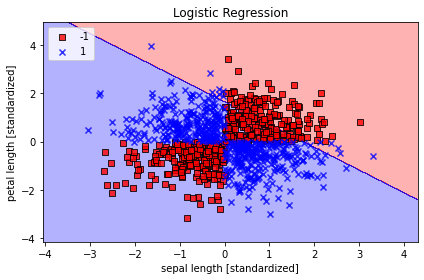

<Figure size 432x288 with 0 Axes>

Confusion matrix (XOR model)
 [[105 379]
 [ 14 502]] 

Accuracy =  0.607


In [ ]:
# sklearn implementation of SGDClassifier

# Import libraries
from sklearn.linear_model import SGDClassifier

# Create logit instance and fit model
# if loss="log" we obtain a logistic regression
# if loss="perceptron" we obtain a Perceptron
#SGD = SGDClassifier(loss="perceptron",eta0=0.01)
SGD = SGDClassifier(loss="log",eta0=0.01,learning_rate='adaptive')
SGD.fit(X, y)

# Plot decision regions
plot_decision_regions(X, y, classifier=SGD)
plt.title('Logistic Regression')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

# Compute confusion matrix
y_hat = SGD.predict(X)
cm = sklearn.metrics.confusion_matrix(y,y_hat)
accuracy = sklearn.metrics.accuracy_score(y,y_hat)
print("Confusion matrix (XOR model)\n",cm, "\n\nAccuracy = ",accuracy) 